# 데이터 전처리 

## 데이터 전처리: 서울 상암 월드컵 경기장 사용자 통계 

In [137]:
import pandas as pd 

In [138]:
file_path = r'/Users/2eueu_/대학교/대회/빅데이터아이디어챌린지_2024/서울시설공단_서울월드컵경기장 주경기장 사용자 통계_20231231.csv'

In [139]:
df = pd.read_csv(file_path, encoding = 'euc-kr') 

In [140]:
df['경기(행사) 일시'] = pd.to_datetime(df['경기(행사) 일시'])

In [141]:
df = df[df['경기(행사) 일시'] >= pd.Timestamp('2022.1.1')] 

In [142]:
df = df[df['경기(행사) 내용'].str.contains('K리그|국가대표|팀k리그', na = False)]

In [143]:
# 필요한 열만 선택 
selected_columns = ['경기(행사) 일시', '구 분', '경기(행사) 종류', ' 관람인원(명) ', '수입금(원)', '사용일수(일)']
filtered_df = df[selected_columns] 

In [144]:
print(filtered_df)

              경기(행사) 일시   구 분                          경기(행사) 종류   관람인원(명)   \
253 2022-03-19 16:30:00   K리그                               K리그1     6481.0   
255 2022-04-06 19:30:00   K리그                               K리그1     3967.0   
256 2022-04-10 19:00:00   K리그                               K리그1    14998.0   
257 2022-05-08 16:30:00   K리그                               K리그1    13197.0   
258 2022-05-15 19:00:00   K리그                               K리그1     8892.0   
259 2022-05-21 16:30:00   K리그                               K리그1     9560.0   
261 2022-05-28 16:30:00   K리그                               K리그1     8609.0   
262 2022-06-02 20:00:00  국가대표                         국가대표팀 친선경기    61633.0   
263 2022-06-14 20:00:00  국가대표                         국가대표팀 친선경기    53769.0   
264 2022-06-22 19:30:00   K리그                               K리그1     8918.0   
265 2022-06-25 20:00:00   K리그                               K리그1    11158.0   
266 2022-07-06 19:30:00   K리그                       

In [145]:
filtered_df.to_csv('filtered_data.csv', index = False) 

## 데이터 전처리: 서울시 상권 분석 

In [146]:
# 2022년 서울시 상권 분석 데이터 불러오기 
file_2022 = '/Users/2eueu_/대학교/대회/빅데이터아이디어챌린지_2024/서울시_상권분석서비스(추정매출-상권)_2022년.xlsx'

In [147]:
# 2023년 이후 서울시 상권 분석 데이터 불러오기 
file_2023 = '/Users/2eueu_/대학교/대회/빅데이터아이디어챌린지_2024/서울시 상권분석서비스(추정매출-상권).xlsx'

- pip install openxyl (해주기)

In [148]:
df_2022 = pd.read_excel(file_2022) 

In [149]:
df_2023 = pd.read_excel(file_2023) 

In [150]:
# df_2022와 df_2023의 데이터프레임 합치기 
df_combined = pd.concat([df_2022, df_2023], ignore_index = True) 

In [151]:
# 상권_코드_명의 각 값이 몇 번 등장하는지 출력하기 위해 (:월드컵경기장 주변 상권을 찾기 위해) 
print(df_combined['상권_코드_명'].value_counts())
## 너무 많아서 서울시 상권 분석 서비스에서 지도로 찾아봄 

상권_코드_명
명동 남대문 북창동 다동 무교동 관광특구    498
강남역                       459
역삼역                       456
장안동사거리                    456
노원역                       448
                         ... 
청담근린공원                      3
정독도서관                       2
평화시장(통일상가, 동화상가)            2
예술인마을                       2
마장지하차도                      1
Name: count, Length: 1572, dtype: int64


In [152]:
# 상권_코드_명에 '월드컵경기장역', '상암동상점가', 'DMC'가 포함된 데이터 필터링 
filtered_data = df_combined[df_combined['상권_코드_명'].str.contains('월드컵경기장역|상암동상점가|DMC', na = False)] 

In [153]:
print(filtered_data) 

       기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드          상권_코드_명 서비스_업종_코드  \
926        20221        D       발달상권  3120098    DMC(디지털미디어시티)  CS100006   
1413       20221        D       발달상권  3120098    DMC(디지털미디어시티)  CS200030   
1492       20221        R       전통시장  3130183           상암동상점가  CS200037   
1960       20221        D       발달상권  3120099  월드컵경기장역(월드컵경기장)  CS100010   
2137       20221        R       전통시장  3130183           상암동상점가  CS100004   
...          ...      ...        ...      ...              ...       ...   
186417     20241        R       전통시장  3130183           상암동상점가  CS200031   
186418     20241        R       전통시장  3130183           상암동상점가  CS200037   
186419     20241        R       전통시장  3130183           상암동상점가  CS300001   
186420     20241        R       전통시장  3130183           상암동상점가  CS300002   
186421     20241        R       전통시장  3130183           상암동상점가  CS300018   

       서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  시간대_건수~21_매출_건수  \
926      

In [154]:
# 필요없는 열 ('상권_구분_코드', '상권_코드', '서비스_업종_코드') 제외 데이터 필터링 
filtered_Data = filtered_data.drop(columns = ['상권_구분_코드', '상권_코드', '서비스_업종_코드'])

In [155]:
# 데이터프레임의 상위 5개의 행을 출력
print(filtered_data.head())

     기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드          상권_코드_명 서비스_업종_코드  \
926      20221        D       발달상권  3120098    DMC(디지털미디어시티)  CS100006   
1413     20221        D       발달상권  3120098    DMC(디지털미디어시티)  CS200030   
1492     20221        R       전통시장  3130183           상암동상점가  CS200037   
1960     20221        D       발달상권  3120099  월드컵경기장역(월드컵경기장)  CS100010   
2137     20221        R       전통시장  3130183           상암동상점가  CS100004   

     서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  시간대_건수~21_매출_건수  \
926       패스트푸드점  1311326771    137732  1026034031  ...            38989   
1413       피부관리실   524316696      1305   485523298  ...              641   
1492         노래방    72048350      2330    57632467  ...             1411   
1960       커피-음료  1990446743      1372  1957072644  ...              314   
2137       양식음식점   438801345     31889   346983294  ...             6051   

      시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  연령대_10_매출_건수  연령대_20_매출_건수  \
926              9308    

- 기준년분기 2023년 3분기까지만 포함 (상암월드컵경기장 데이터 마지막으로 기록된 일시가 2023.11.25 경기이기 때문) 

In [156]:
# 2022년 1분기부터 2023년 3분기까지만 포함 
filtered_data = filtered_data[filtered_data['기준_년분기_코드'].between(20221,20233)] 

In [157]:
print(filtered_data)

       기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드          상권_코드_명 서비스_업종_코드  \
926        20221        D       발달상권  3120098    DMC(디지털미디어시티)  CS100006   
1413       20221        D       발달상권  3120098    DMC(디지털미디어시티)  CS200030   
1492       20221        R       전통시장  3130183           상암동상점가  CS200037   
1960       20221        D       발달상권  3120099  월드컵경기장역(월드컵경기장)  CS100010   
2137       20221        R       전통시장  3130183           상암동상점가  CS100004   
...          ...      ...        ...      ...              ...       ...   
144960     20233        R       전통시장  3130183           상암동상점가  CS200031   
144961     20233        R       전통시장  3130183           상암동상점가  CS200037   
144962     20233        R       전통시장  3130183           상암동상점가  CS300001   
144963     20233        R       전통시장  3130183           상암동상점가  CS300002   
144964     20233        R       전통시장  3130183           상암동상점가  CS300018   

       서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  시간대_건수~21_매출_건수  \
926      

In [158]:
file_path = '/Users/2eueu_/datasoccer/filtered_data_20221_to_20233.xlsx' 

In [211]:
# csv 파일로 저장 
filtered_data.to_csv('filtered_data_20221_to_20233.csv', index=False, encoding='utf-8-sig')

## 데이터 전처리: 두 데이터 합치기 

- filtered_df의 경기(행사) 일시 열의 데이터를 분기 형식으로 변환 

In [190]:
filtered_df['경기(행사) 일시'] = pd.to_datetime(filtered_df['경기(행사) 일시'])

In [191]:
# 분기로 변환하는 함수 
def convert_to_quarter(date): 
    year = date.year
    quarter = (date.month-1) // 3+1 # 1~3월은 1분기, 4~6월은 2분기, 7~9월은 3분기, 10~12월 4분기
    return f"{year}{quarter}"

filtered_df['기준_년분기_코드'] = filtered_df['경기(행사) 일시'].apply(convert_to_quarter)

In [192]:
# '기준_년분기_코드'가  20234인 데이터 제거 (상암월드컵경기장 통계 2023년 3분기까지 있으니) 
filtered_df = filtered_df[filtered_df['기준_년분기_코드'] != '20234'] 

In [193]:
filtered_df.to_csv('filtered_data_updated.csv', index = False, encoding = 'utf-8-sig')

In [194]:
# '기준_년분기_코드'를 첫 번째 열로 이동 
cols = ['기준_년분기_코드'] + [col for col in filtered_df.columns if col != '기준_년분기_코드'] 
filtered_Df = filtered_df[cols]

In [195]:
# 요일 열 추가 작성 
filtered_df['경기일시'] = pd.to_datetime(filtered_df['경기(행사) 일시'])

In [196]:
filtered_df.to_csv('filtered_data_updated.csv', index = False, encoding = 'utf-8-sig')

In [197]:
# 경기일시 열에서 요일을 추출하여 새로운 요일 열을 생성
filtered_df['요일'] = filtered_df['경기일시'].dt.day_name()

In [198]:
# 요일이 영어로 되어 있으니 한국어로 
weekday_map = { 
    'Monday': '월요일', 
    'Tuesday': '화요일', 
    'Wednesday': '수요일', 
    'Thursday': '목요일', 
    'Friday': '금요일', 
    'Saturday': '토요일', 
    'Sunday': '일요일'
}

In [199]:
# 경기일시를 기반으로 영어 요일을 추출하고 한국어로 바꿈 
filtered_df['요일'] = filtered_df['경기일시'].dt.day_name().map(weekday_map)

In [200]:
print(filtered_df[['경기(행사) 일시', '요일']])

              경기(행사) 일시   요일
253 2022-03-19 16:30:00  토요일
255 2022-04-06 19:30:00  수요일
256 2022-04-10 19:00:00  일요일
257 2022-05-08 16:30:00  일요일
258 2022-05-15 19:00:00  일요일
259 2022-05-21 16:30:00  토요일
261 2022-05-28 16:30:00  토요일
262 2022-06-02 20:00:00  목요일
263 2022-06-14 20:00:00  화요일
264 2022-06-22 19:30:00  수요일
265 2022-06-25 20:00:00  토요일
266 2022-07-06 19:30:00  수요일
267 2022-07-13 20:00:00  수요일
268 2022-07-16 20:00:00  토요일
269 2022-08-05 19:30:00  금요일
270 2022-08-21 18:00:00  일요일
271 2022-09-04 16:30:00  일요일
272 2022-09-10 19:00:00  토요일
273 2022-09-13 19:30:00  화요일
274 2022-09-27 20:00:00  화요일
275 2022-10-01 14:00:00  토요일
276 2022-10-12 19:30:00  수요일
277 2022-10-16 19:00:00  일요일
280 2023-02-25 16:30:00  토요일
281 2023-02-25 16:30:00  토요일
282 2023-03-12 14:00:00  일요일
283 2023-03-28 20:00:00  화요일
284 2023-04-08 16:30:00  토요일
285 2023-04-22 14:00:00  토요일
286 2023-05-05 14:00:00  금요일
287 2023-05-09 19:30:00  화요일
288 2023-05-20 18:00:00  토요일
289 2023-05-28 16:30:00  일요일
291 2023-06-11

In [201]:
filtered_df.to_csv('filtered_data_updated.csv', index = False, encoding = 'utf-8-sig')

In [202]:
# 경기일시 열을 datetime 형식으로 변환 
filtered_df['경기일시'] = pd.to_datetime(filtered_df['경기(행사) 일시'])

# 시간 데이터를 통해 새로운 '시간' 열 추가 (시:분 형식으로) 
filtered_df['시간'] = filtered_df['경기일시'].dt.strftime('%H:%M')

# 출력 확인
print(filtered_df[['경기(행사) 일시', '시간']])

              경기(행사) 일시     시간
253 2022-03-19 16:30:00  16:30
255 2022-04-06 19:30:00  19:30
256 2022-04-10 19:00:00  19:00
257 2022-05-08 16:30:00  16:30
258 2022-05-15 19:00:00  19:00
259 2022-05-21 16:30:00  16:30
261 2022-05-28 16:30:00  16:30
262 2022-06-02 20:00:00  20:00
263 2022-06-14 20:00:00  20:00
264 2022-06-22 19:30:00  19:30
265 2022-06-25 20:00:00  20:00
266 2022-07-06 19:30:00  19:30
267 2022-07-13 20:00:00  20:00
268 2022-07-16 20:00:00  20:00
269 2022-08-05 19:30:00  19:30
270 2022-08-21 18:00:00  18:00
271 2022-09-04 16:30:00  16:30
272 2022-09-10 19:00:00  19:00
273 2022-09-13 19:30:00  19:30
274 2022-09-27 20:00:00  20:00
275 2022-10-01 14:00:00  14:00
276 2022-10-12 19:30:00  19:30
277 2022-10-16 19:00:00  19:00
280 2023-02-25 16:30:00  16:30
281 2023-02-25 16:30:00  16:30
282 2023-03-12 14:00:00  14:00
283 2023-03-28 20:00:00  20:00
284 2023-04-08 16:30:00  16:30
285 2023-04-22 14:00:00  14:00
286 2023-05-05 14:00:00  14:00
287 2023-05-09 19:30:00  19:30
288 2023

In [203]:
filtered_df.to_csv('filtered_data_updated.csv', index = False, encoding = 'utf-8-sig')

In [204]:
# 경기 횟수 분석 
## 1. 기준_년분기_코드별로 요일 횟수 계산 (없는 요일은 0으로 채움) 
weekday_pivot = filtered_df.pivot_table(index = '기준_년분기_코드', columns = '요일', aggfunc = 'size', fill_value = 0) 

## 2. 요일 순서를 영어 기준으로 재정렬 
all_days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

## 정렬: 필요한 모든 요일을 포함, 없을 경우 0으로 
weekday_pivot = weekday_pivot.reindex(columns = all_days, fill_value = 0)

## 3. 요일 이름을 한국어로 변경 
weekday_pivot.columns = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'] 

## 출력 
print(weekday_pivot)

           월요일  화요일  수요일  목요일  금요일  토요일  일요일
기준_년분기_코드                                   
20221        0    0    0    0    0    1    0
20222        0    1    2    1    0    3    3
20223        0    2    2    0    1    2    2
20224        0    0    1    0    0    1    1
20231        0    1    0    0    0    2    1
20232        0    1    0    0    1    3    2
20233        0    0    2    1    1    3    2


In [205]:
# 시간 열 추출 (시각만) 
filtered_df['시간'] = filtered_df['경기일시'].dt.hour

# 시간대 (00~06, 06~11, 11~14, 14~17, 17~21, 21~24) 
def assign_time(hour): 
    if 0 <= hour < 6: 
        return '00~06' 
    elif 6 <= hour < 11: 
        return '06~11' 
    elif 11 <= hour < 14: 
        return '11~14' 
    elif 14 <= hour < 17: 
        return '14~17'
    elif 17 <= hour < 21: 
        return '17~21' 
    else: 
        return '21~24' 

# '시간대' 열 추가 
filtered_df['시간대'] = filtered_df['시간'].apply(assign_time) 

# 시간대별 횟수를 기준_년분기_코드로 집계 
time_slot = filtered_df.pivot_table(index = '기준_년분기_코드', columns = '시간대', aggfunc = 'size', fill_value = 0) 

time_slots = ['00~06', '06~11', '11~14', '14~17', '17~21', '21~24'] 
time_slot = time_slot.reindex(columns = time_slots, fill_value = 0)

- 필요 내용만 요약한 데이터 필터링 - 각 분기의 관람인원, 수입금, 사용일, 경기횟수 합계 데이터 정리 

In [206]:
grouped_df = filtered_df.groupby('기준_년분기_코드').agg({ 
    ' 관람인원(명) ': 'sum',
    '수입금(원)': 'sum',
    '사용일수(일)': 'sum'
}).reset_index()

In [207]:
# 각 기준_년분기_코드에 해당하는 경기 횟수 추가 
grouped_df['경기횟수'] = filtered_df.groupby('기준_년분기_코드').size().values 
grouped_df = grouped_df.merge(weekday_pivot, on = '기준_년분기_코드', how = 'left') 

# grouped_df에 시간대별 횟수 데이터 추가 (기준_년분기_코드를 기준으로 병합) 
grouped_df = grouped_df.merge(time_slot, on= '기준_년분기_코드', how = 'left') 

In [208]:
print(grouped_df)

  기준_년분기_코드   관람인원(명)         수입금(원)  사용일수(일)  경기횟수  월요일  화요일  수요일  목요일  금요일  \
0     20221     6481.0  3.988862e+07        1     1    0    0    0    0    0   
1     20222   194701.0  1.466462e+09       12    10    0    1    2    1    0   
2     20223   185463.0  2.041580e+09       17     9    0    2    2    0    1   
3     20224    20429.0  1.337005e+08        3     3    0    0    1    0    0   
4     20231   106189.0  6.400328e+08        5     4    0    1    0    0    0   
5     20232   182136.0  5.637211e+08        7     7    0    1    0    0    1   
6     20233   197678.0  3.885229e+09       10     9    0    0    2    1    1   

   토요일  일요일  00~06  06~11  11~14  14~17  17~21  21~24  
0    1    0      0      0      0      1      0      0  
1    3    3      0      0      0      3      7      0  
2    2    2      0      0      0      1      8      0  
3    1    1      0      0      0      1      2      0  
4    2    1      0      0      0      3      1      0  
5    3    2      0     

In [209]:
grouped_df.to_csv('grouped_filtered_data.csv', index = False, encoding = 'utf-8-sig')

# 데이터 시각화 

## 데이터 분석 1: 서울시 DMC, 상암동상점가, 월드컵경기장역 상권의 2022년 1분기 ~ 2023년 3분기 상권별 당월 매출 금액 분석 

In [180]:
sales_summary = filtered_data.groupby('상권_코드_명')['당월_매출_금액'].sum().reset_index()

In [181]:
sales_summary = sales_summary.sort_values(by = '당월_매출_금액', ascending = False) 

In [182]:
print(sales_summary)

           상권_코드_명      당월_매출_금액
0    DMC(디지털미디어시티)  381700193411
1           상암동상점가  143592447416
2  월드컵경기장역(월드컵경기장)   85376709738


In [183]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
import numpy as np 

In [184]:
plt.rc('font', family = 'AppleGothic') 

/var/folders/nm/7v0jvy_d7kb39zdv1c715bx40000gn/T/ipykernel_1103/579171724.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(sales_summary))


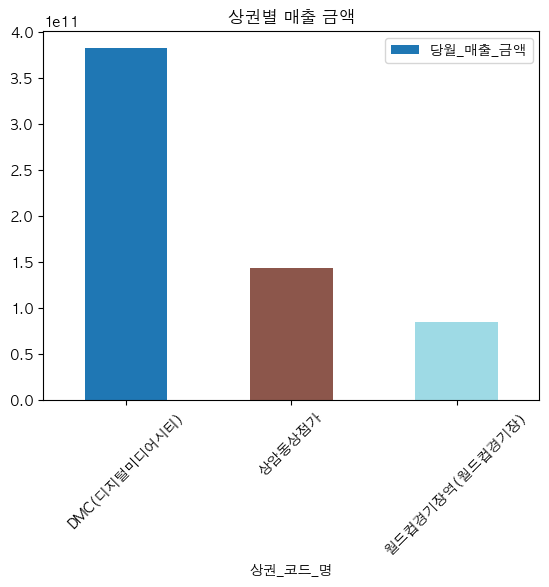

In [185]:
colors = plt.cm.get_cmap('tab20', len(sales_summary))
sales_summary.plot(kind = 'bar', x = '상권_코드_명', y = '당월_매출_금액', color = colors(np.arange(len(sales_summary))), title = '상권별 매출 금액')
plt.xticks(rotation = 45)
plt.show()

- 2022년 1분기 ~ 2023년 3분기의 당월 매출 금액은 DMC(디지털미디어시티), 상암동상점가, 월드컵경기장역(월드컵경기장) 순서로 상권별 매출이 높다 

## 데이터 시각화2: 상암 월드컵 경기장 기준 년 분기마다 관람인원 시각화 

/var/folders/nm/7v0jvy_d7kb39zdv1c715bx40000gn/T/ipykernel_1103/1896539277.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(grouped_df['기준_년분기_코드']))


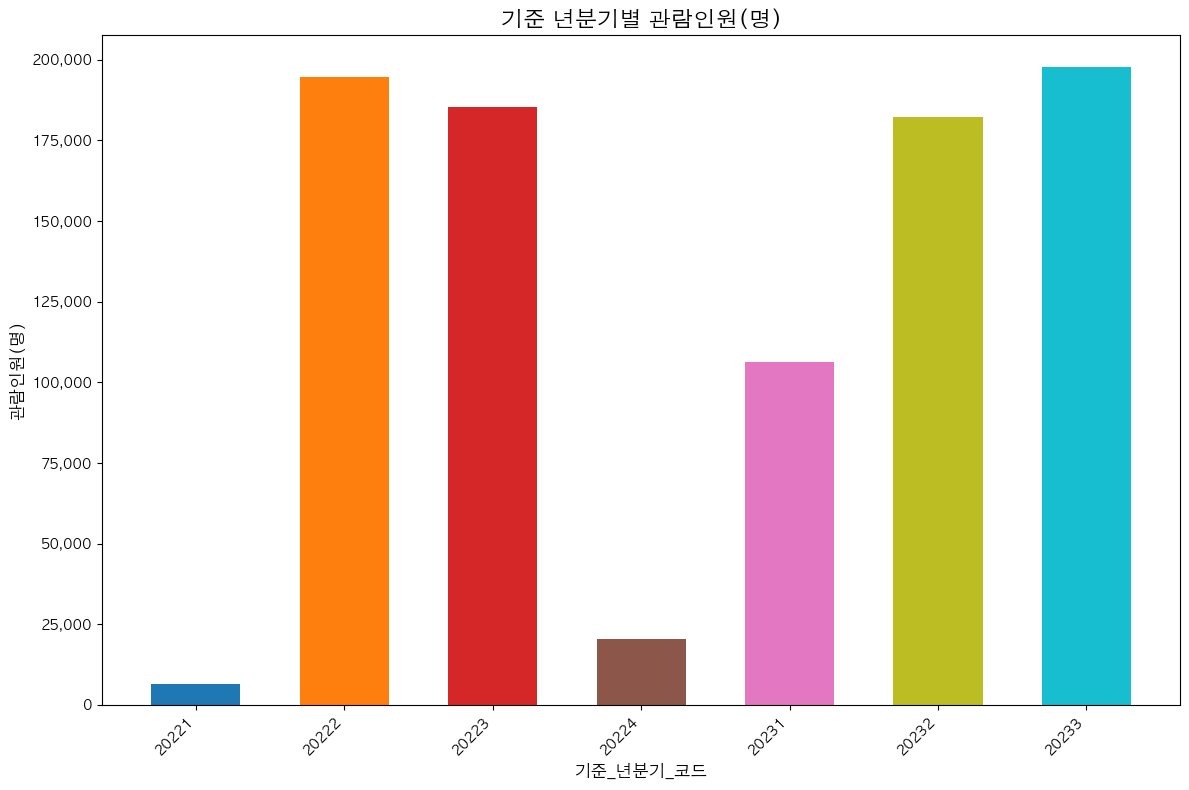

In [186]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick 

plt.figure(figsize = (12, 8))

# 관람인원 시각화 - 기준_년분기마다 다른 색 
colors = plt.cm.get_cmap('tab10', len(grouped_df['기준_년분기_코드']))
plt.bar(grouped_df['기준_년분기_코드'], grouped_df[' 관람인원(명) '], 
        color = [colors(i) for i in range(len(grouped_df))], width = 0.6) # 막대 너비 조정 

# 제목 축 
plt.title('기준 년분기별 관람인원(명)', fontsize = 16) 
plt.xlabel('기준_년분기_코드', fontsize = 12) 
plt.ylabel('관람인원(명)', fontsize =12) 

# y축 
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}')) 

# x축 
plt.xticks(rotation = 45, ha = 'right') 

plt.tight_layout()
plt.show()

- 관람인원이 가장 적은 분기: 2022년 1분기 
- 관람인원이 가장 많은 분기: 2023년 3분기

## 데이터 시각화3: 상암 월드컵 경기장의 각 년 분기마다 수입금(원) 시각화 

/var/folders/nm/7v0jvy_d7kb39zdv1c715bx40000gn/T/ipykernel_1103/2455598079.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(grouped_df['기준_년분기_코드']))


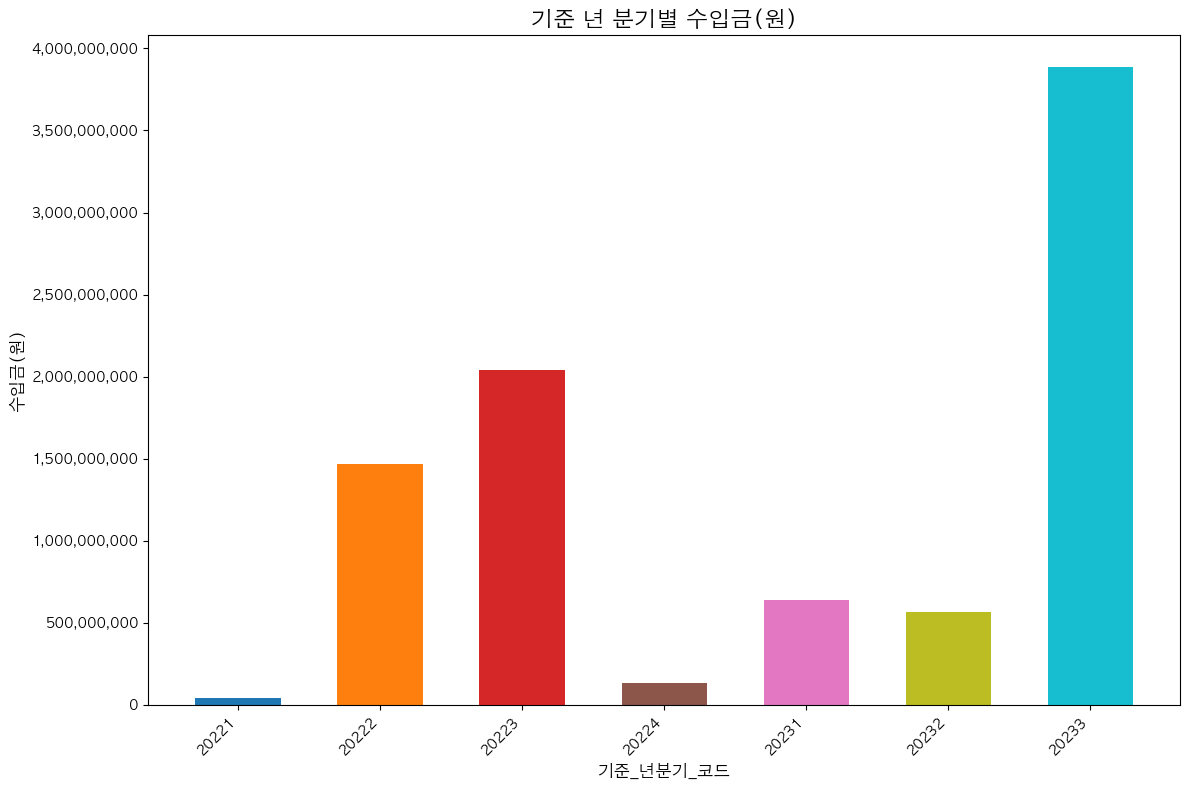

In [187]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick 

plt.figure(figsize = (12, 8))

# 수입금 시각화 - 기준_년분기마다 다른 색 
colors = plt.cm.get_cmap('tab10', len(grouped_df['기준_년분기_코드']))
plt.bar(grouped_df['기준_년분기_코드'], grouped_df['수입금(원)'], 
        color = [colors(i) for i in range(len(grouped_df))], width = 0.6) # 막대 너비 

# 제목 축 
plt.title('기준 년 분기별 수입금(원)', fontsize = 16) 
plt.xlabel('기준_년분기_코드', fontsize = 12)
plt.ylabel('수입금(원)', fontsize = 12) 

# y축 
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# x축 
plt.xticks(rotation = 45, ha = 'right') 

plt.tight_layout()
plt.show()

- 수입금 가장 적은 분기: 2022년 1분기 
- 수입금 가장 큰 분기: 2023년 3분기 

## 데이터 시각화4: 상암동상점가, 월드컵경기장역, DMC의 2022년 1분기와 2023년 3분기의 당월 매출 건수 비교 - 히트맵 

In [212]:
import pandas as pd

file_path = 'filtered_data_20221_to_20233.csv'
df = pd.read_csv(file_path)

locations_to_compare = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']
filtered_df = df[df['상권_코드_명'].isin(locations_to_compare)]

# 20233과 20221 분기 데이터 필터링
df_20233 = filtered_df[filtered_df['기준_년분기_코드'] == 20233]
df_20221 = filtered_df[filtered_df['기준_년분기_코드'] == 20221]

# 당월_매출_금액, 당월_매출_건수 확인
df_comparison = pd.concat([df_20233[['상권_코드_명', '당월_매출_금액', '당월_매출_건수']],
                           df_20221[['상권_코드_명', '당월_매출_금액', '당월_매출_건수']]])
print(df_comparison)

           상권_코드_명    당월_매출_금액  당월_매출_건수
363  DMC(디지털미디어시티)  8972161667    366068
364  DMC(디지털미디어시티)   918935521     30123
365  DMC(디지털미디어시티)  1498472467     52370
366  DMC(디지털미디어시티)  2043238463     43563
367  DMC(디지털미디어시티)   983043928     89254
..             ...         ...       ...
55   DMC(디지털미디어시티)   104516188       384
56   DMC(디지털미디어시티)  1453252244     34053
57   DMC(디지털미디어시티)   488016902     47007
58          상암동상점가   184185929      6750
59   DMC(디지털미디어시티)  3493584605     97942

[119 rows x 3 columns]


In [228]:
import requests
import folium
from folium.plugins import HeatMap, DualMap

# Overpass API URL
overpass_url = "http://overpass-api.de/api/interpreter"

# 상암동(3884277)과 성산2동(3884291)의 Overpass 쿼리
overpass_query = """
[out:json];
relation(3884277);
out geom;
relation(3884291);
out geom;
"""

# API 요청 보내기
response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()

# 좌표 저장할 리스트
coords_sangam = []
coords_seongsan2 = []

# 상암동과 성산2동 좌표 추출
for element in data['elements']:
    if element['type'] == 'relation':
        if element['id'] == 3884277:  # 상암동 relation ID
            for member in element['members']:
                if member['type'] == 'way' and 'geometry' in member:
                    for coord in member['geometry']:
                        coords_sangam.append([coord['lat'], coord['lon']])
        elif element['id'] == 3884291:  # 성산2동 relation ID
            for member in element['members']:
                if member['type'] == 'way' and 'geometry' in member:
                    for coord in member['geometry']:
                        coords_seongsan2.append([coord['lat'], coord['lon']])

# 상권 관련 지역의 위도와 경도 설정
locations = {
    '상암동상점가': [37.579621, 126.890292],
    'DMC(디지털미디어시티)': [37.576339, 126.897776],
    '월드컵경기장역(월드컵경기장)': [37.569543, 126.899614]
}

# 매출 건수를 기반으로 히트맵 데이터 생성
def generate_heatmap_data(df):
    return [[locations[row['상권_코드_명']][0], locations[row['상권_코드_명']][1], row['당월_매출_건수']] 
            for index, row in df.iterrows() if row['상권_코드_명'] in locations]

# DualMap을 사용하여 두 분기의 비교 지도 생성
m_dual = DualMap(location=[37.5780, 126.8903], zoom_start=14)

# 각 분기별로 당월 매출 건수 합계 데이터를 생성
df_20221_sum = df_20221.groupby('상권_코드_명')['당월_매출_건수'].sum().reset_index()
df_20233_sum = df_20233.groupby('상권_코드_명')['당월_매출_건수'].sum().reset_index()

# 매출 건수의 비율 계산 (20233 / 20221)
df_merged = pd.merge(df_20221_sum, df_20233_sum, on='상권_코드_명', suffixes=('_20221', '_20233'))
df_merged['매출_건수_비율'] = df_merged['당월_매출_건수_20233'] / df_merged['당월_매출_건수_20221']

# 각 분기별 히트맵 데이터 추가
heat_data_20221 = [[locations[row['상권_코드_명']][0], locations[row['상권_코드_명']][1], row['당월_매출_건수_20221']] 
                   for index, row in df_merged.iterrows() if row['상권_코드_명'] in locations]

heat_data_20233 = [[locations[row['상권_코드_명']][0], locations[row['상권_코드_명']][1], row['매출_건수_비율']] 
                   for index, row in df_merged.iterrows() if row['상권_코드_명'] in locations]

# 20221 분기 히트맵 추가 (파란색)
HeatMap(heat_data_20221, radius=25, gradient={0.2: 'blue', 0.5: 'lightblue', 1: 'darkblue'}).add_to(m_dual.m1)

# 20233 분기 비율 히트맵 추가 (빨간색)
HeatMap(heat_data_20233, radius=25, gradient={0.2: 'red', 0.5: 'orange', 1: 'darkred'}).add_to(m_dual.m2)

# 상암동과 성산2동 폴리곤을 각각의 맵에 추가
def add_polygons_to_map(map_obj):
    # 상암동 폴리곤 추가
    if coords_sangam:
        folium.Polygon(locations=coords_sangam, color='darkred', fill=True, fill_color='red', fill_opacity=0.1, tooltip="상암동").add_to(map_obj)
    else:
        print("상암동 폴리곤을 추가할 좌표가 없습니다.")
    
    # 성산2동 폴리곤 추가
    if coords_seongsan2:
        folium.Polygon(locations=coords_seongsan2, color='darkorange', fill=True, fill_color='orange', fill_opacity=0.1, tooltip="성산2동").add_to(map_obj)
    else:
        print("성산2동 폴리곤을 추가할 좌표가 없습니다.")

# 상권 위치를 지도에 마커로 추가
def add_location_markers(map_obj):
    for name, coords in locations.items():
        folium.Marker(
            location=coords,
            popup=name,
            tooltip=name
        ).add_to(map_obj)

# DualMap에 상암동과 성산2동 폴리곤 추가
add_polygons_to_map(m_dual.m1)
add_polygons_to_map(m_dual.m2)

# DualMap에 상권 위치 마커 추가
add_location_markers(m_dual.m1)
add_location_markers(m_dual.m2)

# DualMap 저장
m_dual.save('dualmap_comparison_with_polygons_and_markers.html')

html_text = '''
<div style="width: 100%; text-align: center; margin-top: 10px;">
    <h3>Dual Map Comparison</h3>
    <p><b>왼쪽 지도:</b> 2022년 1 분기, <b>오른쪽 지도:</b> 2023년 3 분기</p>
    <p><b>상암동상점가, DMC(디지털미디어시티), 월드컵경기장역</b>의 매출 건수 히트맵 비교</p>
</div>
'''

# 지도 외부에 텍스트를 표시
html_template = f'''
<div style="width: 100%; height: 600px;">
    <iframe src="dualmap_comparison_with_polygons_and_markers.html" style="width: 100%; height: 100%;"></iframe>
</div>
{html_text}
'''

# HTML 레이아웃을 주피터 노트북에서 표시
from IPython.display import HTML, display
display(HTML(html_template))


## 데이터 시각화 5: 2022년 1분기와 2023년 3분기의 상권별(DMC, 올림픽경기장역, 상암동상점가) 매출 금액 비교 & 매출 건수 비교  - 바 차트

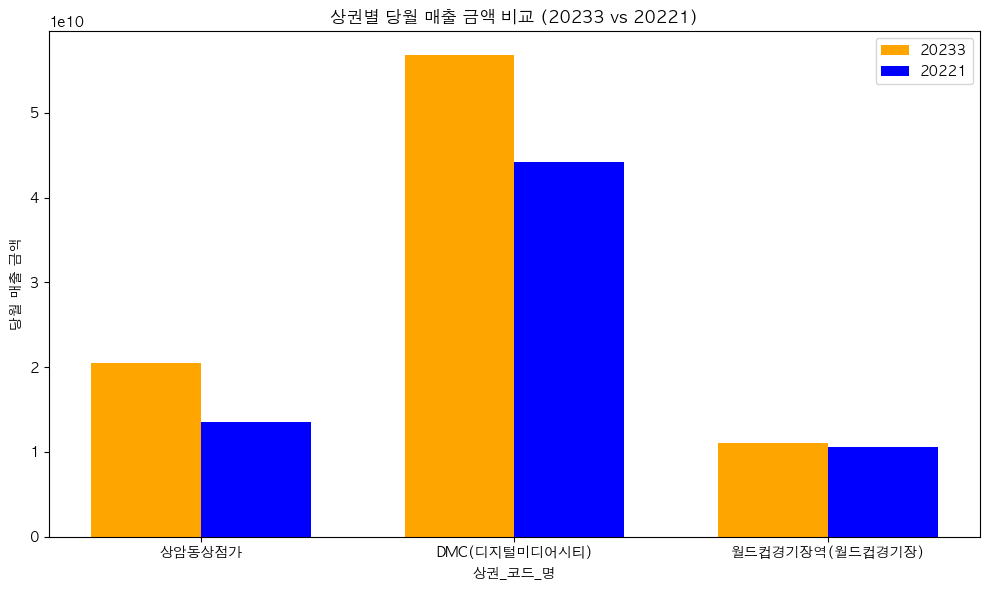

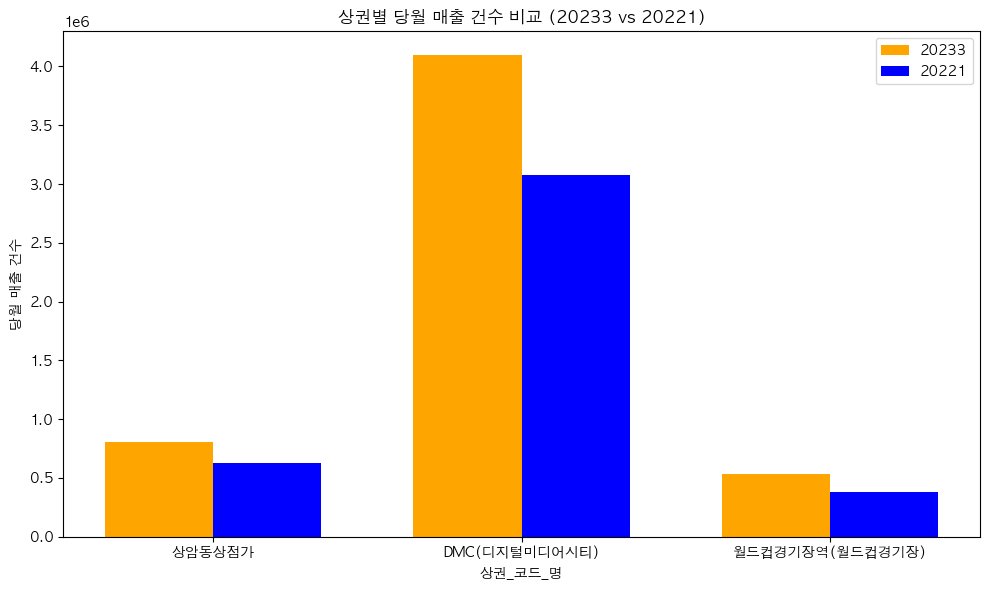

In [214]:
import matplotlib.pyplot as plt
import pandas as pd

# 상권 데이터 (상암동상점가, DMC, 월드컵경기장역)
locations = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']

# 20233과 20221 분기 데이터를 필터링
df_20233 = df[df['기준_년분기_코드'] == 20233]
df_20221 = df[df['기준_년분기_코드'] == 20221]

# 상권별 당월 매출 금액과 매출 건수를 비교하는 바 차트
def plot_bar_chart(data_20233, data_20221, value_column, ylabel, title):
    # 상권가
    locations = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']
    
    # 20233과 20221 분기의 데이터 추출
    values_20233 = [data_20233[data_20233['상권_코드_명'] == loc][value_column].sum() for loc in locations]
    values_20221 = [data_20221[data_20221['상권_코드_명'] == loc][value_column].sum() for loc in locations]
    
    # 막대 차트 생성
    bar_width = 0.35
    index = range(len(locations))

    plt.figure(figsize=(10, 6))
    
    # 20233 분기 데이터
    plt.bar(index, values_20233, bar_width, label='20233', color='orange')
    
    # 20221 분기 데이터
    plt.bar([i + bar_width for i in index], values_20221, bar_width, label='20221', color='blue')
    
    # 차트 
    plt.xlabel('상권_코드_명')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks([i + bar_width / 2 for i in index], locations)
    plt.legend()

    
    plt.tight_layout()
    plt.show()

# 당월 매출 금액 비교
plot_bar_chart(df_20233, df_20221, '당월_매출_금액', '당월 매출 금액', '상권별 당월 매출 금액 비교 (20233 vs 20221)')

# 당월 매출 건수 비교
plot_bar_chart(df_20233, df_20221, '당월_매출_건수', '당월 매출 건수', '상권별 당월 매출 건수 비교 (20233 vs 20221)')


- 2023년 3분기의 모든 상권의 당월 매출건수, 매출금액이 2022년 1분기보다 더 높게 나왔다

## 데이터 시각화 6 : 2022년 1분기와 2023년 3분기의 '14~17', '17~21', '21~24'시간대별 당월 매출 금액 비교 - 바 차트 

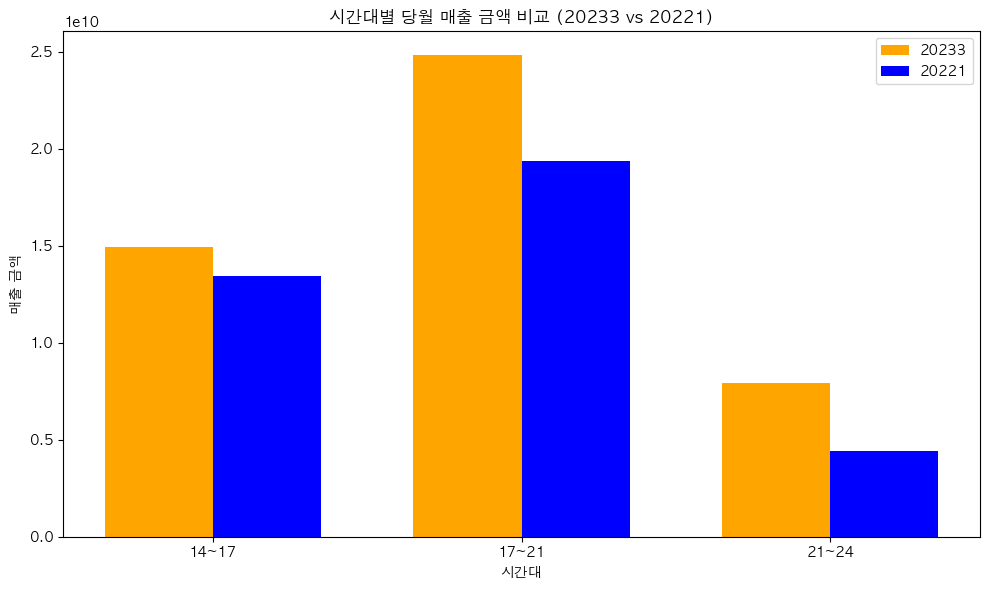

In [216]:
import matplotlib.pyplot as plt

# 각 시간대별로 매출 데이터를 비교하는 함수
def plot_time_slot_comparison(data_20233, data_20221, title):
    time_slots = ['14~17', '17~21', '21~24']

    # 각 분기별로 시간대 매출 합계 계산
    values_20233 = [
        data_20233['시간대_14~17_매출_금액'].sum(),
        data_20233['시간대_17~21_매출_금액'].sum(),
        data_20233['시간대_21~24_매출_금액'].sum()
    ]
    
    values_20221 = [
        data_20221['시간대_14~17_매출_금액'].sum(),
        data_20221['시간대_17~21_매출_금액'].sum(),
        data_20221['시간대_21~24_매출_금액'].sum()
    ]

    # 바 차트 생성
    bar_width = 0.35
    index = range(len(time_slots))

    plt.figure(figsize=(10, 6))
    
    # 20233 분기 데이터
    plt.bar(index, values_20233, bar_width, label='20233', color='orange')
    
    # 20221 분기 데이터
    plt.bar([i + bar_width for i in index], values_20221, bar_width, label='20221', color='blue')
    
    # 차트 설정
    plt.xlabel('시간대')
    plt.ylabel('매출 금액')
    plt.title(title)
    plt.xticks([i + bar_width / 2 for i in index], time_slots)
    plt.legend()

    # 차트 표시
    plt.tight_layout()
    plt.show()

# 20233 분기와 20221 분기의 데이터 준비
df_20233 = df[df['기준_년분기_코드'] == 20233]
df_20221 = df[df['기준_년분기_코드'] == 20221]

# 시간대 매출 비교
plot_time_slot_comparison(df_20233, df_20221, '시간대별 당월 매출 금액 비교 (20233 vs 20221)')

- 2023년 3분기 모든 시간대가 매출금액이 2022년 1분기보다 높다 

## 데이터 시각화 7 : 2022년 1분기와 2023년 3분기의 14~17, 17~21, 21~24 시간대의 매출 건수를 비교 - 히트맵

In [229]:
import folium
from folium.plugins import HeatMap, DualMap
from IPython.display import IFrame, display, HTML

# 두 개의 맵을 비교할 수 있는 DualMap 생성
m_dual = DualMap(location=[37.5780, 126.8903], zoom_start=14)

# 상권 관련 지역의 위도와 경도 설정
locations = {
    '상암동상점가': [37.579621, 126.890292],
    'DMC(디지털미디어시티)': [37.576339, 126.897776],
    '월드컵경기장역(월드컵경기장)': [37.569543, 126.899614]
}

# 각 시간대별 매출 건수를 합산하는 함수
def sum_time_slot_sales(df, time_slots):
    result = df[time_slots].sum(axis=1)
    return result

# 시간대별 매출 건수 합계를 그룹화하여 데이터프레임 생성
def prepare_time_slot_data(df):
    time_slots = ['시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']
    df['매출_건수_합계'] = sum_time_slot_sales(df, time_slots)
    
    df_grouped = df.groupby('상권_코드_명')['매출_건수_합계'].sum().reset_index()
    return df_grouped

# 각 분기 데이터 준비
df_20221_time = prepare_time_slot_data(df_20221)
df_20233_time = prepare_time_slot_data(df_20233)

# 매출 건수의 비율 계산 (20233 / 20221)
df_merged_time = pd.merge(df_20221_time, df_20233_time, on='상권_코드_명', suffixes=('_20221', '_20233'))
df_merged_time['매출_건수_비율'] = df_merged_time['매출_건수_합계_20233'] / df_merged_time['매출_건수_합계_20221']

# 각 분기별 히트맵 데이터 추가
heat_data_20221_time = [[locations[row['상권_코드_명']][0], locations[row['상권_코드_명']][1], row['매출_건수_합계_20221']] 
                        for index, row in df_merged_time.iterrows() if row['상권_코드_명'] in locations]

heat_data_20233_time = [[locations[row['상권_코드_명']][0], locations[row['상권_코드_명']][1], row['매출_건수_비율']] 
                        for index, row in df_merged_time.iterrows() if row['상권_코드_명'] in locations]

# 20221 분기 히트맵 추가 (파란색)
HeatMap(heat_data_20221_time, radius=25, gradient={0.2: 'blue', 0.5: 'lightblue', 1: 'darkblue'}).add_to(m_dual.m1)

# 20233 분기 비율 히트맵 추가 (빨간색)
HeatMap(heat_data_20233_time, radius=25, gradient={0.2: 'red', 0.5: 'orange', 1: 'darkred'}).add_to(m_dual.m2)

# 상암동과 성산2동 폴리곤을 각각의 맵에 추가
def add_polygons_to_map(map_obj):
    # 상암동 폴리곤 추가
    if coords_sangam:
        folium.Polygon(locations=coords_sangam, color='darkred', fill=True, fill_color='red', fill_opacity=0.1, tooltip="상암동").add_to(map_obj)
    else:
        print("상암동 폴리곤을 추가할 좌표가 없습니다.")
    
    # 성산2동 폴리곤 추가
    if coords_seongsan2:
        folium.Polygon(locations=coords_seongsan2, color='darkorange', fill=True, fill_color='orange', fill_opacity=0.1, tooltip="성산2동").add_to(map_obj)
    else:
        print("성산2동 폴리곤을 추가할 좌표가 없습니다.")

# 상권 위치를 지도에 마커로 추가
def add_location_markers(map_obj):
    for name, coords in locations.items():
        folium.Marker(
            location = coords,
            popup = name,
            tooltip = name
        ).add_to(map_obj)

# DualMap에 상암동과 성산2동 폴리곤 추가
add_polygons_to_map(m_dual.m1)
add_polygons_to_map(m_dual.m2)

# DualMap에 상권 위치 마커 추가
add_location_markers(m_dual.m1)
add_location_markers(m_dual.m2)

# 지도를 HTML 파일로 저장
m_dual.save('dualmap_comparison_time_slots.html')

# 지도를 주피터에서 표시
display(IFrame('dualmap_comparison_time_slots.html', width=900, height=600))

# 텍스트로 추가
description = """
<h3>2022년 1분기와 2023년 3분기의 상권별 시간대 매출 건수 비교</h3>
<p>왼쪽은 2022년 1 분기와 오른쪽은 2023년 3 분기의 상암동상점가의 DMC(디지털미디어시티), 월드컵경기장역에서의 <br>
시간대(14~17, 17~21, 21~24)별 매출 건수의 비교를 시각화한 지도입니다.<br></p>
"""

# 주피터에서 표시
display(HTML(description))

/var/folders/nm/7v0jvy_d7kb39zdv1c715bx40000gn/T/ipykernel_1103/3273516529.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['매출_건수_합계'] = sum_time_slot_sales(df, time_slots)
/var/folders/nm/7v0jvy_d7kb39zdv1c715bx40000gn/T/ipykernel_1103/3273516529.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['매출_건수_합계'] = sum_time_slot_sales(df, time_slots)


## 데이터 시각화 8 : 2022년 1분기와 2023년 3분기의 주말 매출 건수 (주말이 경기가 제일 많이 열리는 날임) - 바 차트

- 2022년 1분기 주말 매출 (축구 경기 횟수가 가장 적은 분기 & 축구 경기가 가장 많이 열리는 주말)
- 2023년 3분기 주말 매출 (축구 경기 횟수가 가장 많은 분기 & 축구 경기가 가장 많이 열리는 주말)

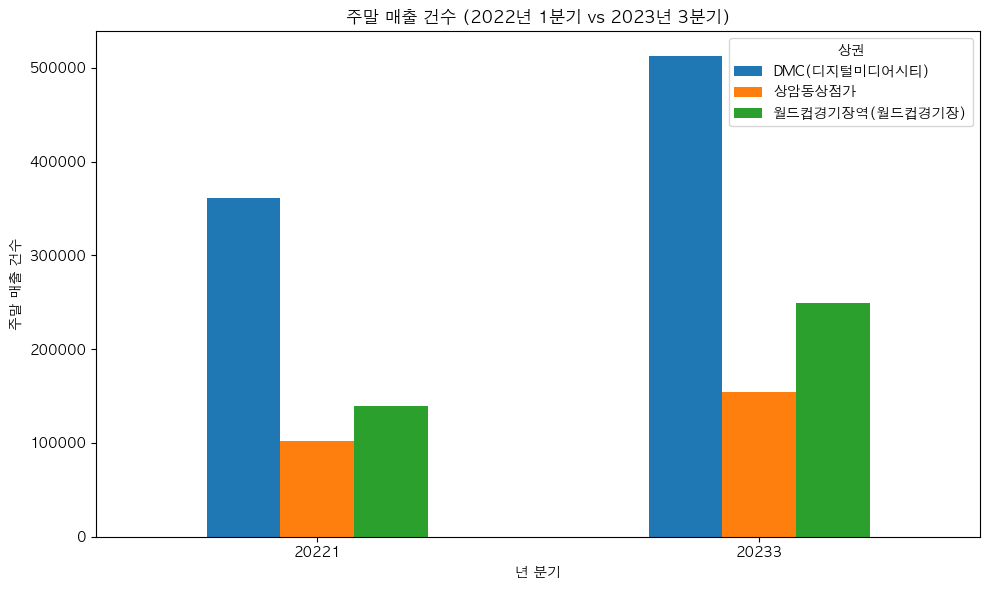

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'filtered_data_20221_to_20233.csv'
data = pd.read_csv(file_path)

# 데이터 필터
filtered_data2 = data[(data['기준_년분기_코드'].isin([20221, 20233])) &
                     (data['상권_코드_명'].isin(['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']))]

# Group data2 : '기준_년분기_코드' and '상권_코드_명' and sum the '주말_매출_건수'
grouped_data2 = filtered_data2.groupby(['기준_년분기_코드', '상권_코드_명'])['주말_매출_건수'].sum().unstack()

# 바 차트
grouped_data2.plot(kind ='bar', figsize = (10, 6))

# 텍스트
plt.title('주말 매출 건수 (2022년 1분기 vs 2023년 3분기)')
plt.xlabel('년 분기')
plt.ylabel('주말 매출 건수')
plt.xticks(rotation = 0)
plt.legend(title = '상권')
plt.tight_layout()


plt.show()

- 주말 매출건 건수는 2023년 3분기의 모든 상권이 2022년 1분기보다 높다 

## 데이터 시각화 9 : 2022년 1분기의 상권별 14~24시의 어느 서비스 업종이 매출 건수가 높은지 비교  - 원 그래프

- 이를 토대로 축구 경기 적은 분기의 비즈니스 전략 

In [219]:
import pandas as pd

# 1. 데이터 불러오기
file_path = 'filtered_data_20221_to_20233.csv'
df = pd.read_csv(file_path)

# 2. 2022년 1분기 데이터 필터링 (기준_년분기_코드 20221)
df_20221 = df[df['기준_년분기_코드'] == 20221]

# 3. 14~24시 시간대 매출 건수 필터링
time_slots = ['시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']
df_20221['시간대_매출_건수_합계'] = df_20221[time_slots].sum(axis = 1)

# 4. 상권마다 서비스 업종별 매출 건수 집계 (상암동상점가, DMC, 월드컵경기장역)
locations = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']

for location in locations:
    print(f"\n{location}의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):")
    
    # 해당 상권의 데이터 필터링
    df_location = df_20221[df_20221['상권_코드_명'] == location]
    
    # 서비스 업종별 매출 건수 집계 및 내림차순 정렬
    service_sales = df_location.groupby('서비스_업종_코드_명')['시간대_매출_건수_합계'].sum().sort_values(ascending=False)
    
    # 출력
    print(service_sales)


상암동상점가의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):
서비스_업종_코드_명
한식음식점      83329
커피-음료      62074
편의점        49982
패스트푸드점     28841
슈퍼마켓       24409
일식음식점      14997
호프-간이주점    10757
양식음식점      10662
한의원         9745
치킨전문점       6408
제과점         4792
중식음식점       3912
노래방         2330
미용실          909
당구장          877
분식전문점        644
일반교습학원       280
육류판매         169
일반의류          25
의약품            0
Name: 시간대_매출_건수_합계, dtype: int64

DMC(디지털미디어시티)의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):
서비스_업종_코드_명
편의점           342823
커피-음료         171508
문구            156097
화장품           148300
의약품            83434
분식전문점          78448
한식음식점          77656
패스트푸드점         68971
일반의원           48218
제과점            26550
슈퍼마켓           24474
양식음식점          14141
반찬가게           11732
일식음식점          10307
화초              7132
치과의원            6816
중식음식점           5749
호프-간이주점         5530
미용실             3768
일반교습학원          2783
안경              2030
골프연습장           1689
피부관리실           1095
서적              1092
스포츠클럽   

/var/folders/nm/7v0jvy_d7kb39zdv1c715bx40000gn/T/ipykernel_1103/1477183792.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20221['시간대_매출_건수_합계'] = df_20221[time_slots].sum(axis = 1)



상암동상점가의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):


/var/folders/nm/7v0jvy_d7kb39zdv1c715bx40000gn/T/ipykernel_1103/629331479.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20221['시간대_매출_건수_합계'] = df_20221[time_slots].sum(axis=1)


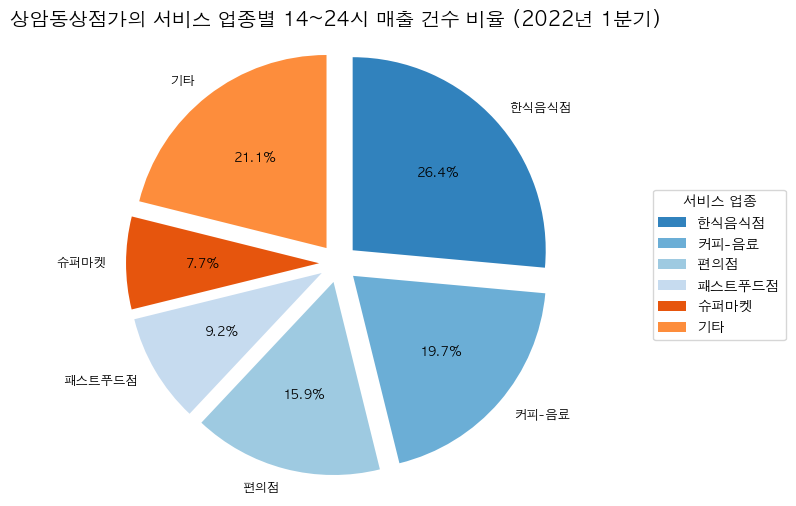


DMC(디지털미디어시티)의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):


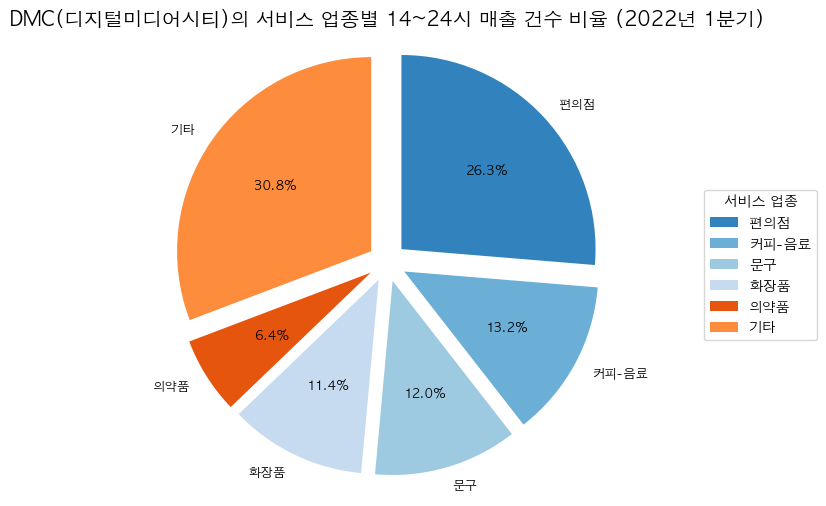


월드컵경기장역(월드컵경기장)의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):


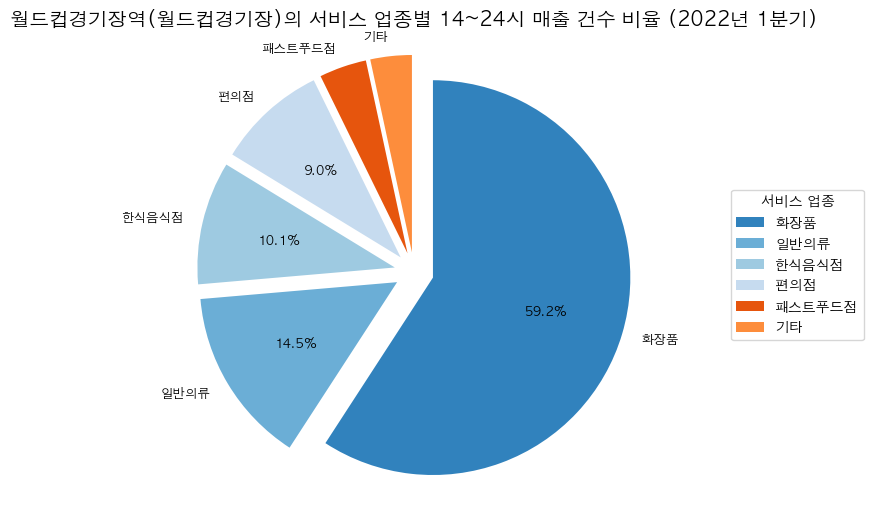

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = 'filtered_data_20221_to_20233.csv'
df = pd.read_csv(file_path)

# 2. 2022년 1분기 데이터 필터링 (기준_년분기_코드 20221)
df_20221 = df[df['기준_년분기_코드'] == 20221]

# 3. 14~24시 시간대 매출 건수 필터링
time_slots = ['시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']
df_20221['시간대_매출_건수_합계'] = df_20221[time_slots].sum(axis=1)

# 4. 상권마다 서비스 업종별 매출 건수 집계 (상암동상점가, DMC, 월드컵경기장역)
locations = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']

# 색상 팔레트 확장
colors = plt.get_cmap('tab20c').colors  # 20가지 색상을 사용

for location in locations:
    print(f"\n{location}의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):")
    
    # 해당 상권의 데이터 필터링
    df_location = df_20221[df_20221['상권_코드_명'] == location]
    
    # 서비스 업종별 매출 건수 집계 및 내림차순 정렬
    service_sales = df_location.groupby('서비스_업종_코드_명')['시간대_매출_건수_합계'].sum().sort_values(ascending=False)
    
    # 5. 상위 5개와 기타 합산 처리
    top_5 = service_sales[:5]
    other_sum = service_sales[5:].sum()
    
    # pd.concat()을 사용하여 "기타" 항목 추가
    service_sales_top5 = pd.concat([top_5, pd.Series({'기타': other_sum})])
    
    # 파이 차트의 각 섹션 거리 조정 (explode)
    explode = [0.1] * len(service_sales_top5)  # 상위 5개와 기타를 모두 동일하게 거리 조정

    # 작은 섹터는 비율을 표시하지 않음
    def autopct_func(pct):
        return ('%1.1f%%' % pct) if pct > 5 else ''
    
    # 6. 원 그래프 그리기
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(service_sales_top5, labels=service_sales_top5.index, autopct=autopct_func, startangle=90, 
                                      counterclock=False, colors=colors[:len(service_sales_top5)], explode=explode)

    # 레이블이 그래프 외부에 겹치지 않도록 처리
    for text in texts:
        text.set_fontsize(9)
    for autotext in autotexts:
        autotext.set_fontsize(9)
    
    # 범례를 그래프 외부에 배치
    ax.legend(wedges, service_sales_top5.index, title="서비스 업종", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # 타이틀 설정
    plt.title(f'{location}의 서비스 업종별 14~24시 매출 건수 비율 (2022년 1분기)', fontsize=14)
    plt.axis('equal')  # 원이 찌그러지지 않도록 설정
    
    # 그래프 보여주기
    plt.show()

- 상암동상점가: 한식음식점, 커피-음료, 편의점 (순서대로 높다) 
- DMC: 편의점, 커피-음료, 문구 (순서대로 높다) 
- 월드컵경기장역: 화장품, 일반의류, 한식음식점 (순서대로 높다) 

## 데이터 시각화 10: 2023년 3분기의 상권별 14~21시의 어느 서비스 업종이 매출 건수가 높은지 비교 원 그래프로

- 이를 토대로 축구 경기 많은 분기의 비즈니스 전략 

In [223]:
import pandas as pd

# 1. 데이터 불러오기
file_path = 'filtered_data_20221_to_20233.csv'
df = pd.read_csv(file_path)

# 2. 2023년 3분기 데이터 필터링 (기준_년분기_코드 20233)
df_20221 = df[df['기준_년분기_코드'] == 20233]

# 3. 14~24시 시간대 매출 건수 필터링
time_slots = ['시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']
df_20233['시간대_매출_건수_합계'] = df_20233[time_slots].sum(axis=1)

# 4. 상권마다 서비스 업종별 매출 건수 집계 (상암동상점가, DMC, 월드컵경기장역)
locations = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']

for location in locations:
    print(f"\n{location}의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):")
    
    # 해당 상권의 데이터 필터링
    df_location = df_20233[df_20233['상권_코드_명'] == location]
    
    # 서비스 업종별 매출 건수 집계 및 내림차순 정렬
    service_sales = df_location.groupby('서비스_업종_코드_명')['시간대_매출_건수_합계'].sum().sort_values(ascending=False)
    
    # 출력
    print(service_sales)


상암동상점가의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):
서비스_업종_코드_명
한식음식점      110932
커피-음료       92387
편의점         61212
패스트푸드점      32481
슈퍼마켓        29047
호프-간이주점     23722
일식음식점       19316
치킨전문점       14115
한의원          9213
양식음식점        7583
노래방          5384
중식음식점        5209
제과점          4839
분식전문점        3938
당구장          2748
세탁소          1821
미용실          1103
일반교습학원        403
스포츠 강습        118
의약품             3
Name: 시간대_매출_건수_합계, dtype: int64

DMC(디지털미디어시티)의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):
서비스_업종_코드_명
편의점           448378
커피-음료         225579
화장품           180168
문구            147438
분식전문점         105515
한식음식점         100831
의약품            91645
패스트푸드점         86568
일반의원           61589
제과점            46925
전자상거래업         38946
슈퍼마켓           35961
양식음식점          17259
반찬가게           15285
일식음식점          11874
중식음식점           9764
치과의원            7006
미용실             6466
호프-간이주점         6118
화초              5769
골프연습장           4089
안경              2744
일반교습학원          2509
일반의류     


상암동상점가의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):


/var/folders/nm/7v0jvy_d7kb39zdv1c715bx40000gn/T/ipykernel_1103/3943259765.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20233['시간대_매출_건수_합계'] = df_20233[time_slots].sum(axis=1)


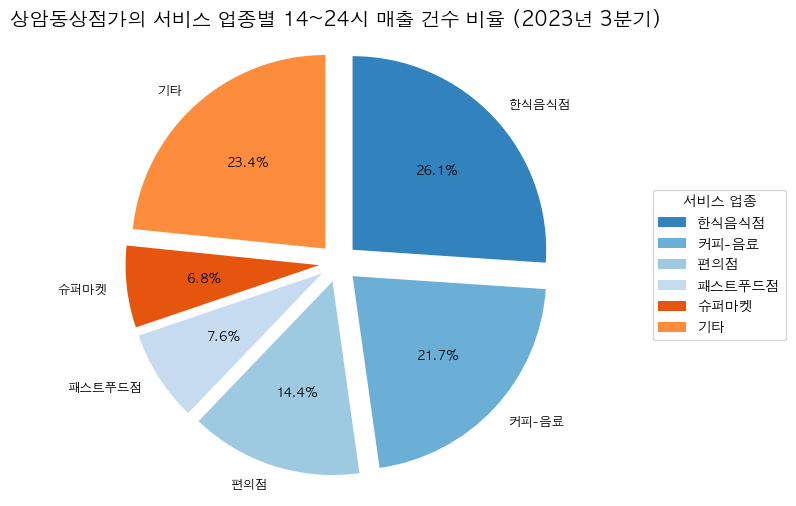


DMC(디지털미디어시티)의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):


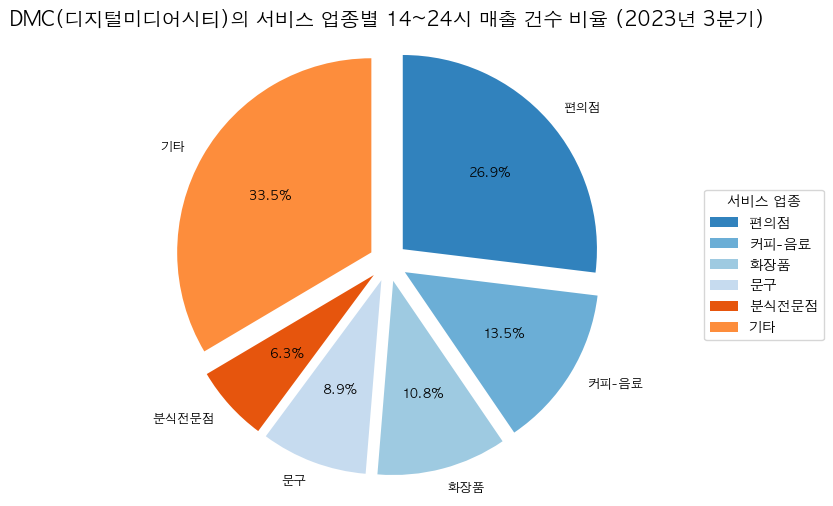


월드컵경기장역(월드컵경기장)의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):


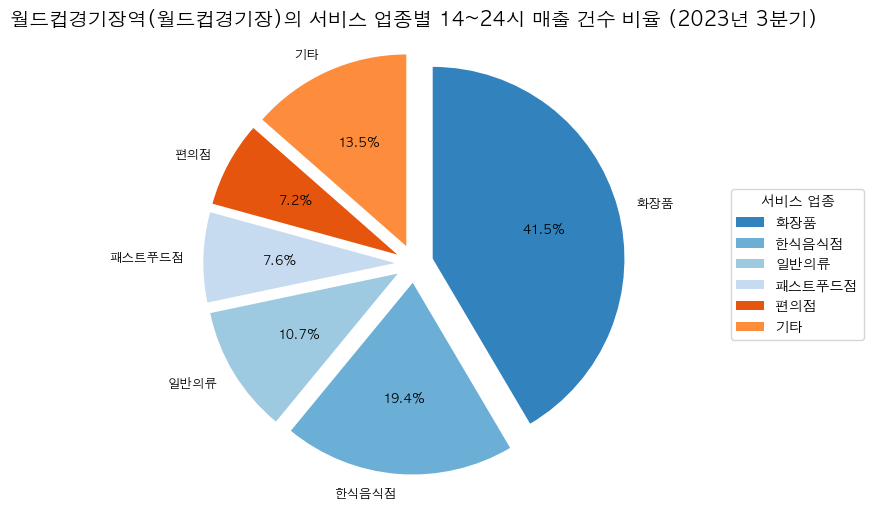

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = 'filtered_data_20221_to_20233.csv'
df = pd.read_csv(file_path)

# 2. 2023년 3분기 데이터 필터링 (기준_년분기_코드 20233)
df_20233 = df[df['기준_년분기_코드'] == 20233]

# 3. 14~24시 시간대 매출 건수 필터링
time_slots = ['시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']
df_20233['시간대_매출_건수_합계'] = df_20233[time_slots].sum(axis=1)

# 4. 상권마다 서비스 업종별 매출 건수 집계 (상암동상점가, DMC, 월드컵경기장역)
locations = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']

# 색상 팔레트 확장
colors = plt.get_cmap('tab20c').colors  # 20가지 색상을 사용

for location in locations:
    print(f"\n{location}의 14~24시 시간대 서비스 업종별 매출 건수 (내림차순):")
    
    # 해당 상권의 데이터 필터링
    df_location = df_20233[df_20233['상권_코드_명'] == location]
    
    # 서비스 업종별 매출 건수 집계 및 내림차순 정렬
    service_sales = df_location.groupby('서비스_업종_코드_명')['시간대_매출_건수_합계'].sum().sort_values(ascending=False)
    
    # 5. 상위 5개와 기타 합산 처리
    top_5 = service_sales[:5]
    other_sum = service_sales[5:].sum()
    
    # pd.concat()을 사용하여 "기타" 항목 추가
    service_sales_top5 = pd.concat([top_5, pd.Series({'기타': other_sum})])
    
    # 파이 차트의 각 섹션 거리 조정 (explode)
    explode = [0.1] * len(service_sales_top5)  # 상위 5개와 기타를 모두 동일하게 거리 조정

    # 작은 섹터는 비율을 표시하지 않음
    def autopct_func(pct):
        return ('%1.1f%%' % pct) if pct > 5 else ''
    
    # 6. 원 그래프 그리기
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(service_sales_top5, labels=service_sales_top5.index, autopct=autopct_func, startangle=90, 
                                      counterclock=False, colors=colors[:len(service_sales_top5)], explode=explode)

    # 레이블이 그래프 외부에 겹치지 않도록 처리
    for text in texts:
        text.set_fontsize(9)
    for autotext in autotexts:
        autotext.set_fontsize(9)
    
    # 범례를 그래프 외부에 배치
    ax.legend(wedges, service_sales_top5.index, title="서비스 업종", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # 타이틀 설정
    plt.title(f'{location}의 서비스 업종별 14~24시 매출 건수 비율 (2023년 3분기)', fontsize=14)
    plt.axis('equal')  # 원이 찌그러지지 않도록 설정
    
    # 그래프 보여주기
    plt.show()

- 상암동상점가: 한식음식점, 커피-음료, 편의점 (순서대로 높다) 
- DMC: 편의점, 커피-음료, 화장품 (순서대로 높다) 
- 월드컵경기장역: 화장품, 한식음식점, 일반의류 (순서대로 높다) 

## 데이터 시각화 11 : 2022년 1분기와 2023년 3분기의 상위 5개 서비스 업종별 주말 매출 건수 비교 

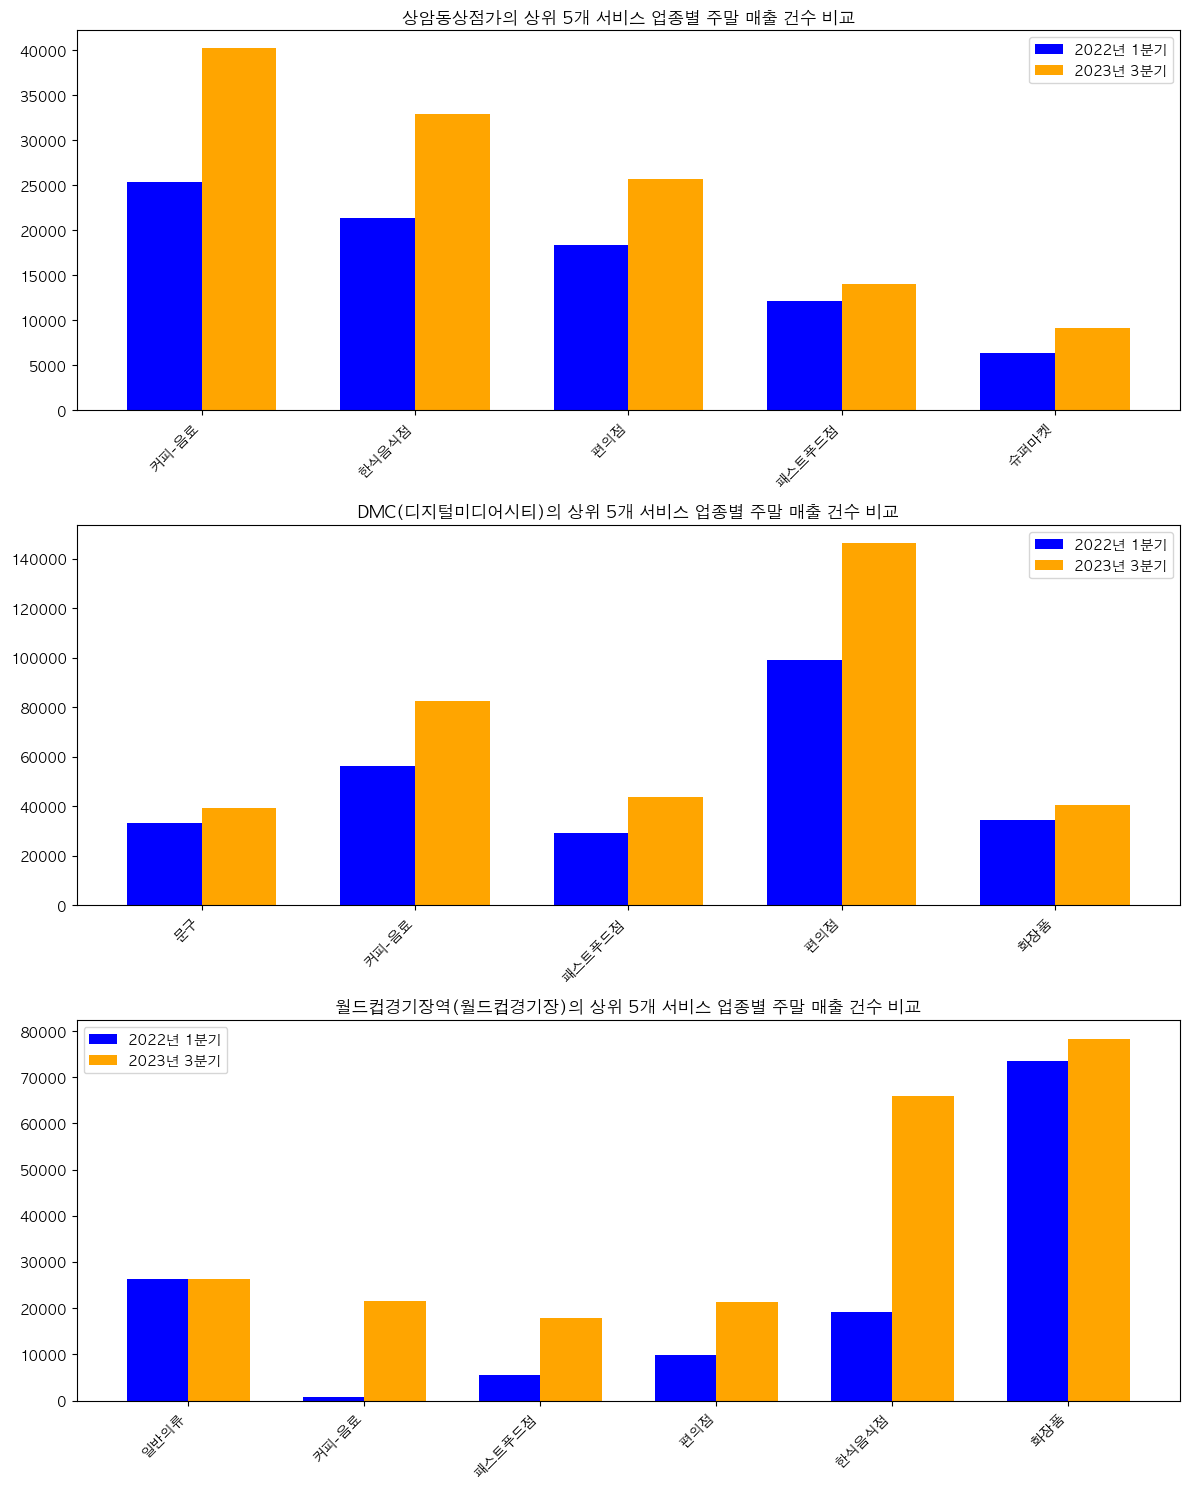

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 불러오기
file_path = 'filtered_data_20221_to_20233.csv'
df = pd.read_csv(file_path)

# 2. 주말 매출 건수 필터링 (주말 매출 건수가 0보다 큰 값만 추출)
df_weekend = df[df['주말_매출_건수'] > 0]

# 3. 2022년 1분기와 2023년 3분기 데이터 필터링
df_20221 = df_weekend[df_weekend['기준_년분기_코드'] == 20221]
df_20233 = df_weekend[df_weekend['기준_년분기_코드'] == 20233]

# 4. 상암동상점가, DMC, 월드컵경기장역 상권 필터링
locations = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']

# 5. 각 상권별 서비스 업종의 주말 매출 건수 합계 계산 함수
def get_service_sales(df, location):
    filtered_df = df[df['상권_코드_명'] == location]
    service_sales = filtered_df.groupby('서비스_업종_코드_명')['주말_매출_건수'].sum()
    return service_sales

# 6. 막대 그래프 그리기 (상위 5개의 서비스 업종만)
fig, axes = plt.subplots(len(locations), 1, figsize=(12, 15))

for i, location in enumerate(locations):
    # 2022년 1분기 및 2023년 3분기의 서비스 업종별 매출 건수 계산
    service_sales_20221 = get_service_sales(df_20221, location)
    service_sales_20233 = get_service_sales(df_20233, location)
    
    # 2022년 1분기와 2023년 3분기의 상위 5개 서비스 업종
    top_5_services_20221 = service_sales_20221.nlargest(5).index
    top_5_services_20233 = service_sales_20233.nlargest(5).index
    top_5_services = top_5_services_20221.union(top_5_services_20233)  # 두 분기 합친 상위 5개 서비스 업종
    
    # 상위 5개 서비스 업종에 대한 매출 데이터 필터링
    service_sales_20221_top5 = service_sales_20221.reindex(top_5_services, fill_value=0)
    service_sales_20233_top5 = service_sales_20233.reindex(top_5_services, fill_value=0)
    
    ind = np.arange(len(top_5_services))  # 상위 5개 업종 인덱스
    width = 0.35  # 막대 폭
    
    # 2022년 1분기 데이터
    axes[i].bar(ind - width/2, service_sales_20221_top5, width, label='2022년 1분기', color='blue')
    
    # 2023년 3분기 데이터
    axes[i].bar(ind + width/2, service_sales_20233_top5, width, label='2023년 3분기', color='orange')
    
    # 타이틀과 레이블 설정
    axes[i].set_title(f'{location}의 상위 5개 서비스 업종별 주말 매출 건수 비교')
    axes[i].set_xticks(ind)
    axes[i].set_xticklabels(top_5_services, rotation=45, ha='right')
    axes[i].legend()

plt.tight_layout()
plt.show()


- 커피·음료와 한식음식점은 상암동상점가에서 가장 매출이 높은 업종이며, 2023년 3분기에 큰 성장을 보였습니다. 편의점과 패스트푸드점도 매우 인기 있는 업종으로, 두 분기 사이에 꾸준한 성장세를 기록하고 있습니다. 슈퍼마켓은 상대적으로 매출 건수가 적지만, 두 분기 사이에 매출이 거의 2배 가까이 증가한 것을 볼 수 있습니다. 상암동상점가에서 음식 관련 업종이 주말 매출의 주도적인 역할을 하고 있으며, 전반적으로 2023년 3분기에 모든 업종에서 성장이 두드러집니다.
  
- 편의점과 커피·음료 업종은 DMC 상권에서 매출이 크게 증가한 두 가지 대표 업종으로, 각각 약 40% 이상의 성장률을 보였습니다.패스트푸드점은 유일하게 두 분기 사이에 매출이 감소한 업종입니다. 문구와 화장품 업종은 상대적으로 매출 증가가 크지 않았지만, 여전히 두 분기 동안 꾸준한 성장을 기록하고 있습니다.
  
- 커피·음료, 패스트푸드점, 편의점은 2023년 3분기에 두드러진 매출 성장을 보였으며, 특히 커피·음료 업종의 성장이 매우 눈에 띕니다.
화장품과 일반 의류는 두 분기 동안 안정적인 매출을 기록하며, 상권에서 꾸준한 소비를 보이는 업종임을 알 수 있습니다. 전반적으로 월드컵경기장역 상권은 2023년 3분기 들어 다양한 서비스 업종에서 매출이 크게 증가했음을 확인할 수 있습니다.

## 데이터 시각화 12: 2022년 1분기와 2023년 3분기의 하위 5개 서비스 업종별 주말 매출 건수 비교 

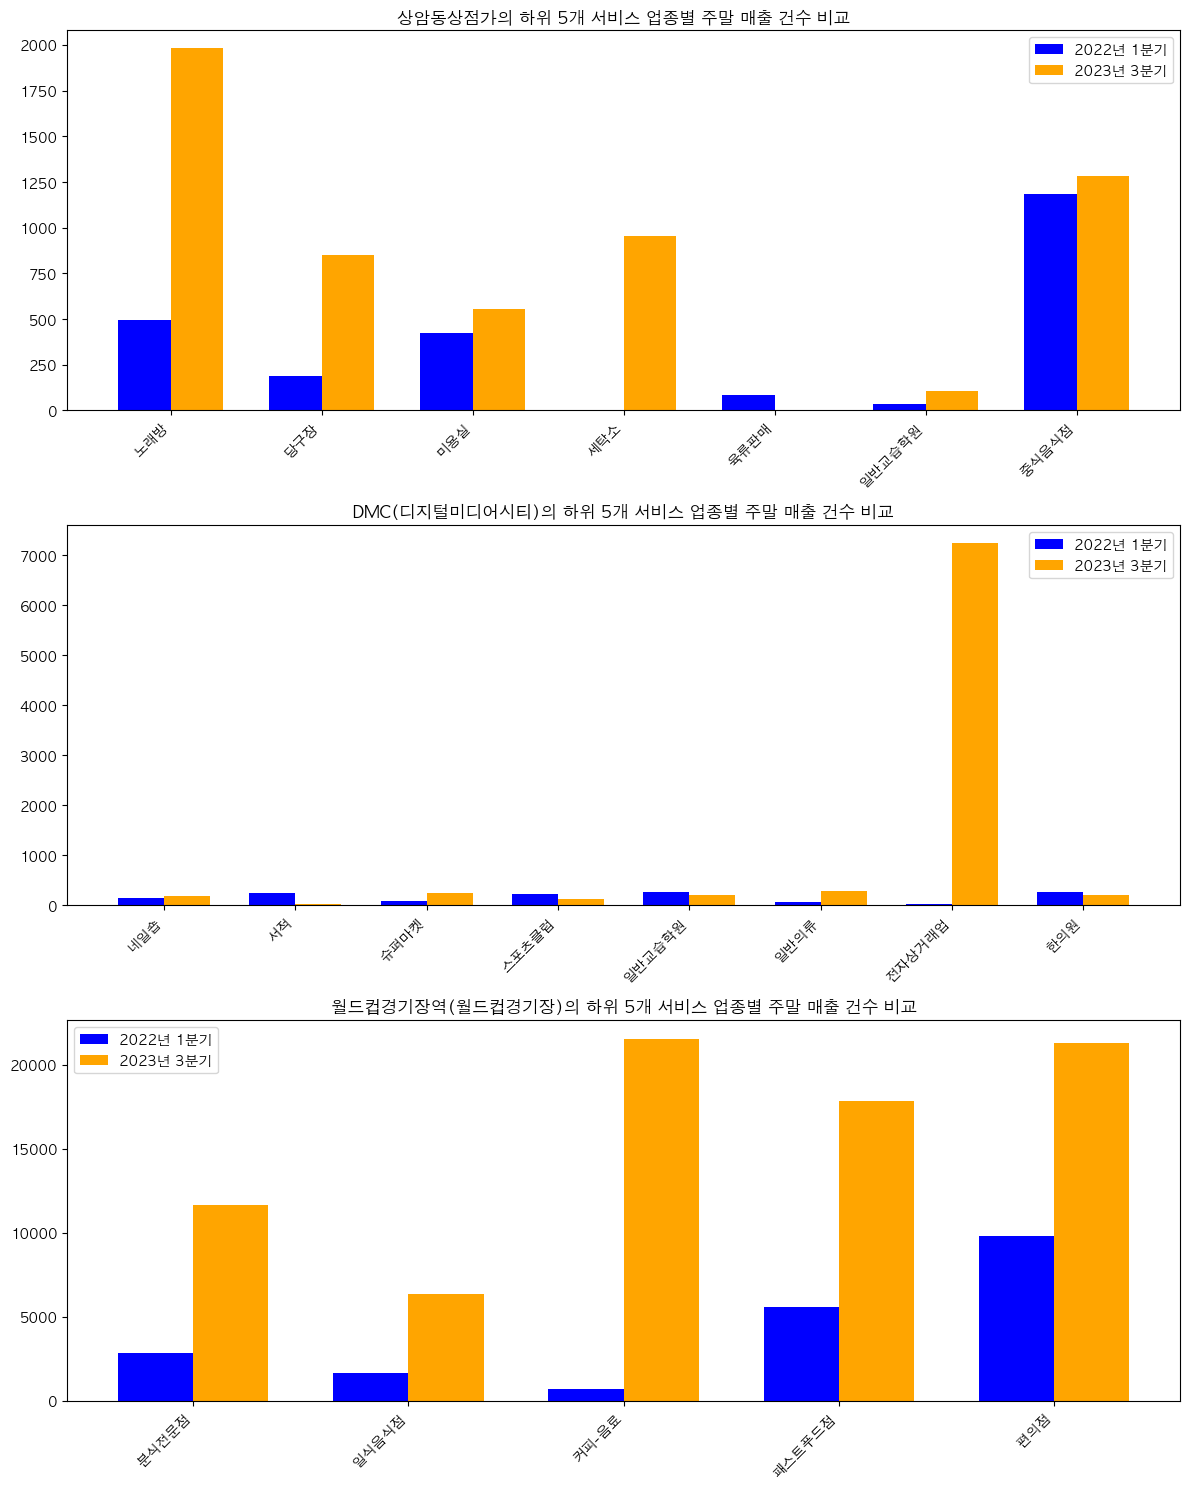

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 불러오기
file_path = 'filtered_data_20221_to_20233.csv'
df = pd.read_csv(file_path)

# 2. 주말 매출 건수 필터링 (주말 매출 건수가 0보다 큰 값만 추출)
df_weekend = df[df['주말_매출_건수'] > 0]

# 3. 2022년 1분기와 2023년 3분기 데이터 필터링
df_20221 = df_weekend[df_weekend['기준_년분기_코드'] == 20221]
df_20233 = df_weekend[df_weekend['기준_년분기_코드'] == 20233]

# 4. 상암동상점가, DMC, 월드컵경기장역 상권 필터링
locations = ['상암동상점가', 'DMC(디지털미디어시티)', '월드컵경기장역(월드컵경기장)']

# 5. 각 상권별 서비스 업종의 주말 매출 건수 합계 계산 함수
def get_service_sales(df, location):
    filtered_df = df[df['상권_코드_명'] == location]
    service_sales = filtered_df.groupby('서비스_업종_코드_명')['주말_매출_건수'].sum()
    return service_sales

# 6. 막대 그래프 그리기 (하위 5개의 서비스 업종)
fig, axes = plt.subplots(len(locations), 1, figsize=(12, 15))

for i, location in enumerate(locations):
    # 2022년 1분기 및 2023년 3분기의 서비스 업종별 매출 건수 계산
    service_sales_20221 = get_service_sales(df_20221, location)
    service_sales_20233 = get_service_sales(df_20233, location)
    
    # 2022년 1분기와 2023년 3분기의 하위 5개 서비스 업종
    bottom_5_services_20221 = service_sales_20221.nsmallest(5).index
    bottom_5_services_20233 = service_sales_20233.nsmallest(5).index
    bottom_5_services = bottom_5_services_20221.union(bottom_5_services_20233)  # 두 분기 합친 하위 5개 서비스 업종
    
    # 하위 5개 서비스 업종에 대한 매출 데이터 필터링
    service_sales_20221_bottom5 = service_sales_20221.reindex(bottom_5_services, fill_value=0)
    service_sales_20233_bottom5 = service_sales_20233.reindex(bottom_5_services, fill_value=0)
    
    ind = np.arange(len(bottom_5_services))  # 하위 5개 업종 인덱스
    width = 0.35  # 막대 폭
    
    # 2022년 1분기 데이터
    axes[i].bar(ind - width/2, service_sales_20221_bottom5, width, label='2022년 1분기', color='blue')
    
    # 2023년 3분기 데이터
    axes[i].bar(ind + width/2, service_sales_20233_bottom5, width, label='2023년 3분기', color='orange')
    
    # 타이틀과 레이블 설정
    axes[i].set_title(f'{location}의 하위 5개 서비스 업종별 주말 매출 건수 비교')
    axes[i].set_xticks(ind)
    axes[i].set_xticklabels(bottom_5_services, rotation=45, ha='right')
    axes[i].legend()

plt.tight_layout()
plt.show()

- 노래방과 당구장, 세탁소 등의 업종은 2023년 3분기에 급격한 매출 성장을 보였으며, 특히 노래방의 성장세가 매우 두드러집니다.
미용실과 중식음식점은 꾸준한 매출을 기록하며, 소폭의 성장을 보였습니다. 상암동상점가에서는 특정 서비스 업종의 매출이 2023년 3분기 들어 크게 활성화되었음을 알 수 있습니다. 특히 오락 및 서비스 관련 업종에서 두드러진 성장이 나타났습니다.
   
- 2023년 3분기에 전자상거래업의 주말 매출 건수가 매우 크게 증가했습니다. 이 서비스 업종은 2022년 1분기에는 거의 매출이 없었지만, 2023년 3분기에는 7000건 이상의 주말 매출 건수를 기록했습니다. 네일숍, 서적, 슈퍼마켓, 스포츠클럽, 일반 고등학원과 같은 다른 서비스 업종들은 2022년과 2023년 모두 매우 낮은 매출 건수를 유지하고 있습니다. 두 분기 사이의 차이가 거의 없거나 매우 적습니다.한의원도 두 분기 사이에 큰 변화가 없으며, 매출 건수가 매우 낮은 수준에 머물러 있습니다.


- 월드컵경기장역 상권에서는 전반적으로 2023년 3분기에 모든 업종에서 큰 매출 성장이 있었음을 확인할 수 있습니다. 특히 분식전문점, 일식음식점, 커피·음료, 패스트푸드점, 편의점 등의 서비스 업종이 두드러진 성장을 보였습니다.